<a href="https://colab.research.google.com/github/harryy88/4995p1/blob/main/p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import os
import tempfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from termcolor import colored as cl 
import itertools 
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [109]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
!curl -L -O "https://training-images-4995.s3.amazonaws.com/data.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 69.0M  100 69.0M    0     0  28.7M      0  0:00:02  0:00:02 --:--:-- 28.7M


In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score 

In [5]:
!unzip -q "data.zip" -d .

In [6]:
!head -n 3 processed_creditcards.csv

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Log Ammount
0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.33832076994251803,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.31116935369987897,1.46817697209427,-0.47040052525947795,0.20797124192924202,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.12853935827352803,-0.189114843888824,0.13355837674038698,-0.0210530534538215,0,5.008105430020374
1,1.1918571113148602,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.16697441400461402,1.6127266610547901,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361

In [104]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier 

In [10]:
df = pd.read_csv('processed_creditcards.csv')
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Log Ammount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008105
1,1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.989913
2,2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936641
3,3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816249
4,4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248367


In [15]:
total_cases = len(df)
valid_transaction_count = len(df[df.Class == 0])
invalid_transaction_count = len(df[df.Class == 1])
perc_fraudulent = round(fraud_count/nonfraud_count*100, 2)

In [22]:
print("There are", total_cases, "Total Cases")
print("Total", valid_transaction_count, "Not frauduelnt cases") 
print("Total", invalid_transaction_count, "actual frauduelnt cases") 
print("RESULT = 100*(", invalid_transaction_count, "/",total_cases, ") = ",  100*invalid_transaction_count / total_cases, "PERCENT Fraudulent")


There are 284807 Total Cases
Total 284315 Not frauduelnt cases
Total 492 actual frauduelnt cases
RESULT = 100*( 492 / 284807 ) =  0.1727485630620034 PERCENT Fraudulent


In [77]:
X = df.values
y = df['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [78]:
print("X =", X.size)
print("Y =", y.size)
print("X_train=",X_train.size)
print("X_test=",X_test.size)
print("y_train=",y_train.size)
print("y_test=",y_test.size)

X = 8829017
Y = 284807
X_train= 7504635
X_test= 1324382
y_train= 242085
y_test= 42722


In [84]:

res = []
tree_max_n = 2
tree_max_acc = 0
tree_max_f1 = 0
tree_knn_yhat = None
for i in range(1,10):
  tree_model = DecisionTreeClassifier(max_depth = i, criterion = 'entropy')
  tree_model.fit(X_train, y_train)
  tree_yhat_loc = tree_model.predict(X_test)
  tree_acc = accuracy_score(y_test, tree_yhat_loc)
  tree_f1 = f1_score(y_test, tree_yhat_loc)
  if tree_acc > tree_max_acc and tree_f1 > tree_max_f1:
    tree_max_acc = tree_acc
    tree_knn_yhat = tree_yhat_loc
    tree_max_f1 = tree_f1
    tree_max_n = i

print("max acc", tree_max_acc)
print("max f1", tree_max_f1)
print("max n", tree_max_n)
# max index 0 

max acc 0.9994557775359011
max f1 0.835978835978836
max n 6


In [89]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In [91]:
print(accuracy_score(y_test, xgb_yhat))
print(f1_score(y_test, xgb_yhat))

0.9994733330992591
0.8421052631578948


In [105]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)
rf_max_n = 0
rf_max_acc = 0
rf_max_f1 = 0
rf_knn_yhat = None
for i in range(2,10):
  rf = RandomForestClassifier(max_depth = i)
  rf.fit(X_train, y_train)
  rf_yhat_l = rf.predict(X_test)
  rf_acc = accuracy_score(y_test, knn_yhat_l)
  rf_f1 = f1_score(y_test, knn_yhat_l)
  if rf_acc > rf_max_acc and rf_f1 > rf_max_f1:
    rf_max_acc = rf_acc
    rf_yhat = rf_yhat_l
    rf_max_f1 = rf_f1
    rf_max_n = i

In [95]:
clg = GaussianNB()
clg.fit(X_train, y_train)
clg_yhat = clg.predict(X_test)
print(accuracy_score(y_test, clg_yhat))
print(f1_score(y_test, clg_yhat))

0.9783364348161933
0.12233285917496445


In [82]:

res = []
knn_max_n = 0
knn_max_acc = 0
knn_max_f1 = 0
knn_knn_yhat = None
for i in range(2,10):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  knn_yhat_l = knn.predict(X_test)
  res.append(knn_yhat_l)
  knn_acc = accuracy_score(y_test, knn_yhat_l)
  knn_f1 = f1_score(y_test, knn_yhat_l)
  if knn_acc > knn_max_acc and knn_f1 > knn_max_f1:
    knn_max_acc = knn_acc
    knn_yhat = knn_yhat_l
    knn_max_f1 = knn_f1
    knn_max_n = i

print("max acc", knn_max_acc)
print("max f1", knn_max_f1)
print("max n", knn_max_n)
# max index 0 

max acc 0.999403110845827
max f1 0.8089887640449437
max n 2


In [83]:
for el in res: 
  print(accuracy_score(y_test, el))
  print(f1_score(y_test, el))

0.999403110845827
0.8089887640449437
0.999385555282469
0.8066298342541437
0.9993504441557529
0.7909604519774012
0.9993328885923949
0.7865168539325842
0.9992977774656788
0.7701149425287357
0.9993153330290369
0.7771428571428572
0.9992451107756047
0.7485380116959064
0.9992451107756047
0.7485380116959064


In [86]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
print(accuracy_score(y_test, lr_yhat))
print(f1_score(y_test, lr_yhat))

0.9992451107756047
0.7542857142857143


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [87]:
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [97]:
print(accuracy_score(y_test, svm_yhat))
print(f1_score(y_test, svm_yhat))

0.998735999438222
0.5


In [55]:
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [110]:
file = tf.keras.utils
raw_df = pd.read_csv('creditcard 2.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [112]:
cleaned_df = raw_df.copy()
cleaned_df.pop('Time')
eps = 0.001 
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)

In [113]:

train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [114]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


In [118]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)
model = make_model()
model.summary()
model.predict(train_features[:10])


initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                480       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [120]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
90/90 [==============================] - 4s 22ms/step - loss: 0.3488 - tp: 109.4945 - fp: 9063.9011 - tn: 130412.3297 - fn: 123.8462 - accuracy: 0.9360 - precision: 0.0153 - recall: 0.4982 - auc: 0.7218 - prc: 0.1104 - val_loss: 0.1146 - val_tp: 11.0000 - val_fp: 1.0000 - val_tn: 45493.0000 - val_fn: 64.0000 - val_accuracy: 0.9986 - val_precision: 0.9167 - val_recall: 0.1467 - val_auc: 0.6969 - val_prc: 0.2568
Epoch 2/100
90/90 [==============================] - 1s 10ms/step - loss: 0.1482 - tp: 56.2747 - fp: 996.0000 - tn: 92991.6923 - fn: 96.6044 - accuracy: 0.9866 - precision: 0.0482 - recall: 0.3667 - auc: 0.6001 - prc: 0.1983 - val_loss: 0.0515 - val_tp: 26.0000 - val_fp: 6.0000 - val_tn: 45488.0000 - val_fn: 49.0000 - val_accuracy: 0.9988 - val_precision: 0.8125 - val_recall: 0.3467 - val_auc: 0.8226 - val_prc: 0.4713
Epoch 3/100
90/90 [==============================] - 1s 10ms/step - loss: 0.0876 - tp: 60.5934 - fp: 208.1099 - tn: 93778.2527 - fn: 93.6154 - accuracy:

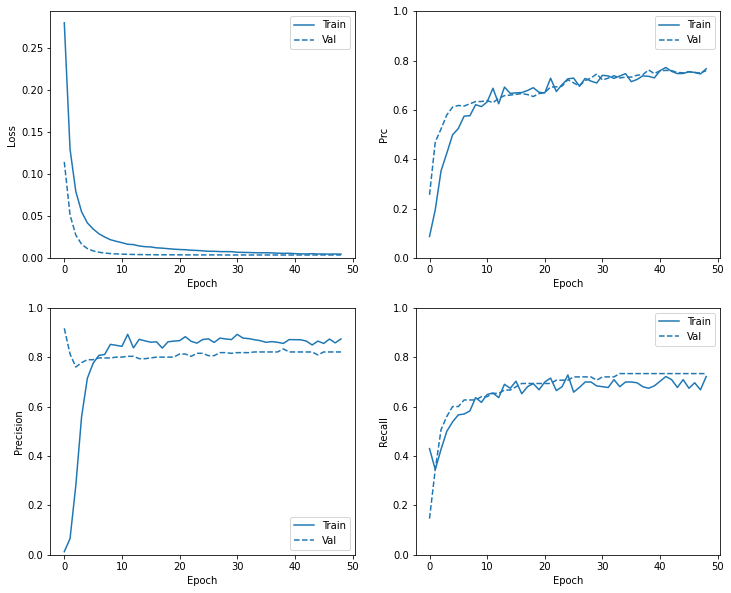

In [122]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()
plot_metrics(baseline_history)

loss :  0.004249707330018282
tp :  75.0
fp :  13.0
tn :  56848.0
fn :  26.0
accuracy :  0.9993153214454651
precision :  0.8522727489471436
recall :  0.7425742745399475
auc :  0.9155665636062622
prc :  0.780822217464447

Legitimate Transactions Detected (True Negatives):  56848
Legitimate Transactions Incorrectly Detected (False Positives):  13
Fraudulent Transactions Missed (False Negatives):  26
Fraudulent Transactions Detected (True Positives):  75
Total Fraudulent Transactions:  101


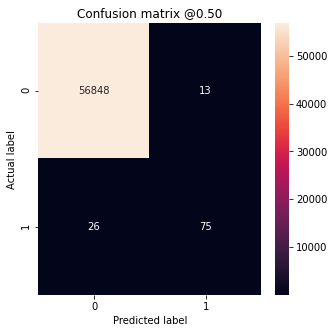

In [125]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

Weight for class 0: 0.50
Weight for class 1: 289.44
Epoch 1/100
90/90 [==============================] - 4s 22ms/step - loss: 0.9108 - tp: 174.0549 - fp: 17967.7253 - tn: 132869.2198 - fn: 91.5714 - accuracy: 0.8932 - precision: 0.0155 - recall: 0.6522 - auc: 0.8178 - prc: 0.1161 - val_loss: 0.3755 - val_tp: 62.0000 - val_fp: 3406.0000 - val_tn: 42088.0000 - val_fn: 13.0000 - val_accuracy: 0.9250 - val_precision: 0.0179 - val_recall: 0.8267 - val_auc: 0.9121 - val_prc: 0.5136
Epoch 2/100
90/90 [==============================] - 1s 11ms/step - loss: 0.4053 - tp: 137.3077 - fp: 16192.0769 - tn: 77783.0879 - fn: 28.0989 - accuracy: 0.8235 - precision: 0.0085 - recall: 0.8422 - auc: 0.8986 - prc: 0.4398 - val_loss: 0.3170 - val_tp: 64.0000 - val_fp: 1537.0000 - val_tn: 43957.0000 - val_fn: 11.0000 - val_accuracy: 0.9660 - val_precision: 0.0400 - val_recall: 0.8533 - val_auc: 0.9262 - val_prc: 0.5851
Epoch 3/100
90/90 [==============================] - 1s 10ms/step - loss: 0.3831 - tp: 141.

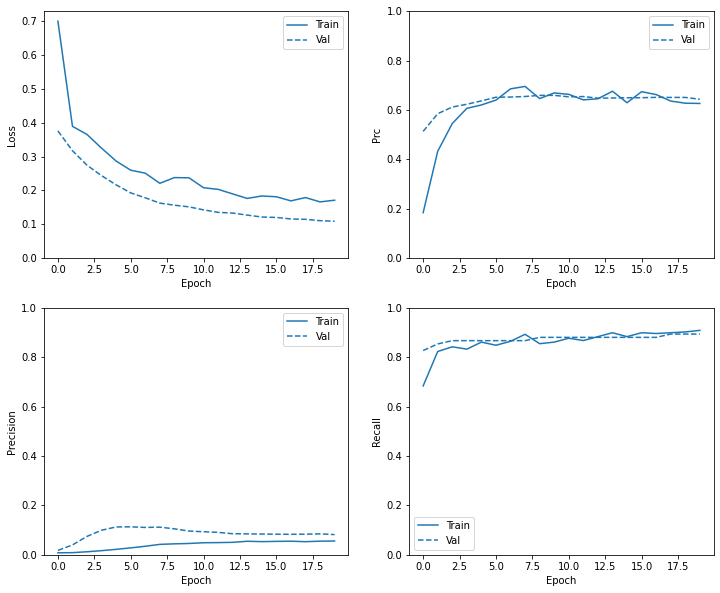

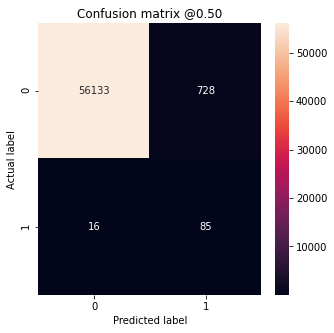

In [128]:
neg, pos = np.bincount(raw_df['Class'])
total = neg + pos
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    class_weight=class_weight)

plot_metrics(weighted_history)
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

In [106]:

print("Accuracy of XG Boost =", accuracy_score(y_test, xgb_yhat), "with F1 Score =", f1_score(y_test, xgb_yhat) )
print("Accuracy of CLG =", accuracy_score(y_test, clg_yhat), "with F1 Score =", f1_score(y_test, clg_yhat) )
print("Accuracy of NKK =", accuracy_score(y_test, knn_yhat), "with F1 Score =", f1_score(y_test, knn_yhat) )
print("Accuracy of Lin. Reg =", accuracy_score(y_test, lr_yhat), "with F1 Score =", f1_score(y_test, lr_yhat) )
print("Accuracy of SVM =", accuracy_score(y_test, svm_yhat), "with F1 Score =", f1_score(y_test, svm_yhat) )
print("Accuracy of Decision Tree =", accuracy_score(y_test, tree_knn_yhat), "with F1 Score =", f1_score(y_test, tree_knn_yhat) )
print("Accuracy of Random Forest =", accuracy_score(y_test, rf_yhat), "with F1 Score =", f1_score(y_test, rf_yhat) )


Accuracy of XG Boost = 0.9994733330992591 with F1 Score = 0.8421052631578948
Accuracy of CLG = 0.9783364348161933 with F1 Score = 0.12233285917496445
Accuracy of NKK = 0.999403110845827 with F1 Score = 0.8089887640449437
Accuracy of Lin. Reg = 0.9992451107756047 with F1 Score = 0.7542857142857143
Accuracy of SVM = 0.998735999438222 with F1 Score = 0.5
Accuracy of Decision Tree = 0.9994557775359011 with F1 Score = 0.835978835978836
Accuracy of Random Forest = 0.9990519995786665 with F1 Score = 0.674698795180723


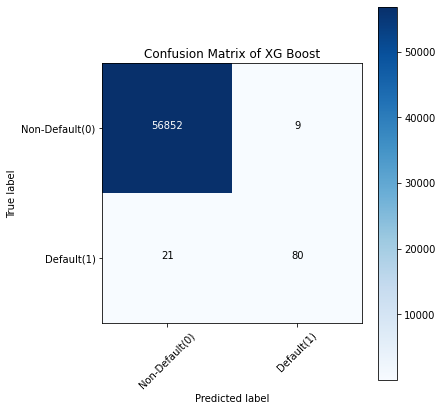

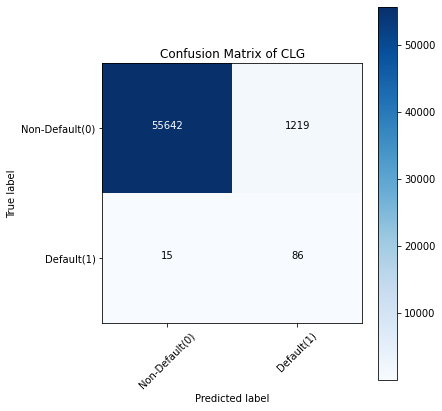

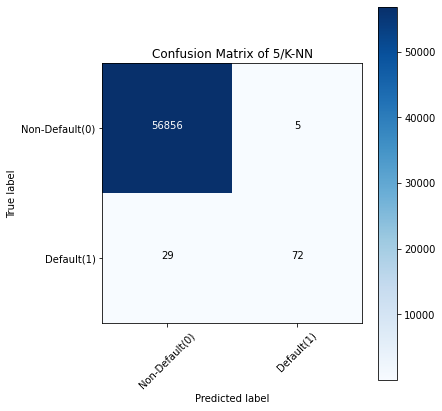

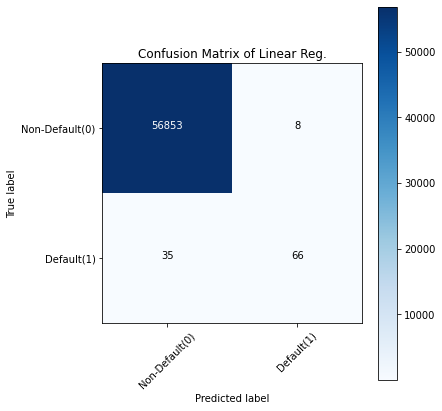

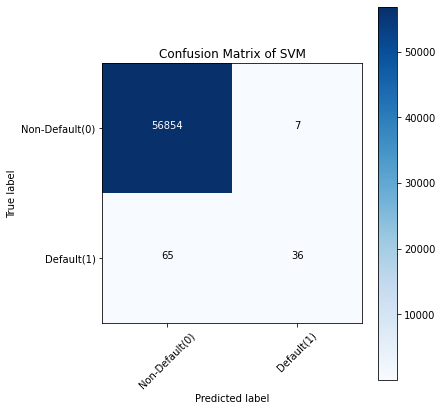

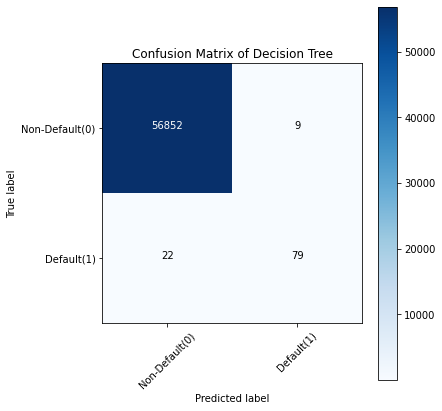

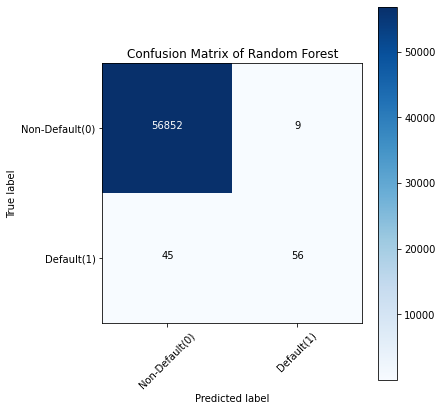

In [130]:
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1])
clg_matrix = confusion_matrix(y_test, clg_yhat, labels = [0, 1])
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1])
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1])
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1])
tree_matrix = confusion_matrix(y_test, tree_knn_yhat, labels = [0, 1])
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1])

plt.rcParams['figure.figsize'] = (6, 6)

knn_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XG Boost')

plt.show()
CLG_plot = plot_confusion_matrix(clg_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'CLG')
plt.show()
knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = '5/K-NN')
plt.show()
lreg_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Linear Reg.')
plt.show()
svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.show()
dt_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.show()
rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest')

plt.show()
